In [1]:
# Project: Amazon Prime Video Dataset Challange
# Name: Jemma Tang
# Date: 09/04/2020
# Goal: build a prediction model to predict whether a movie is going to perform well on the platform 
# based on the information given in the dataset

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [3]:
# There are 4226 rows with 16 features. 
# I will review this further to identify what attributes will be necessary 
# and what data manipulation needs to be carried out before Exploratory analysis and prediction modelling
prime = pd.read_csv("TVdata.CSV")
prime

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_category
0,385504,307127.605608,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000,42930462,6.5,112.301017,51,other award,PG-13,1.710000
1,300175,270338.426375,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000,3301046,6.5,94.983250,41,no award,R,3.250000
2,361899,256165.867446,1,3,other,2012,"Crime,Drama",197596,26000000,37397291,7.3,115.763675,58,other award,R,2.646667
3,308314,196622.720996,3,4,lionsgate,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339,15000000,15700000,7.6,130.703583,94,Oscar,R,1.666667
4,307201,159841.652064,1,3,lionsgate,2013,"Crime,Thriller,Mystery,Documentary",46720,27220000,8551228,6.4,105.545533,37,other award,R,3.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221,160848,9.726396,3,32,other,2010,"Comedy,Drama",14,0,0,7.8,4.311600,0,no award,NotRated,1.700000
4222,365178,7.912698,29,35,other,2013,Music,0,0,0,0.0,4.878900,0,no award,PG-13,0.000000
4223,11615,2.935691,3,27,other,2008,Comedy,505,0,0,7.1,110.350000,0,other award,NotRated,0.000000
4224,26365,2.866614,4,15,other,2003,Documentary,5,100000,0,6.0,79.633333,0,no award,NotRated,0.000000


In [11]:
# check column list and missing values
prime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   video_id                       4226 non-null   int64  
 1   cvt_per_day                    4226 non-null   float64
 2   weighted_categorical_position  4226 non-null   int64  
 3   weighted_horizontal_poition    4226 non-null   int64  
 4   import_id                      4226 non-null   object 
 5   release_year                   4226 non-null   int64  
 6   genres                         4226 non-null   object 
 7   imdb_votes                     4226 non-null   int64  
 8   budget                         4226 non-null   int64  
 9   boxoffice                      4226 non-null   int64  
 10  imdb_rating                    4226 non-null   float64
 11  duration_in_mins               4226 non-null   float64
 12  metacritic_score               4226 non-null   i

In [12]:
# wow, no missing values!

In [16]:
prime.drop(columns=['video_id','release_year'],axis=1).describe(percentiles=[0.1,0.25,0.5,0.75,0.95])

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
count,4226.000000,4226.000000,4226.000000,4226.000000,4.226000e+03,4.226000e+03,4226.000000,4226.000000,4226.000000,4226.000000
mean,4218.630239,7.782537,28.103644,6462.924042,2.150743e+06,2.536338e+06,5.257099,89.556123,15.973734,0.954651
std,13036.079964,6.134183,11.863649,31596.006790,7.176604e+06,8.243516e+06,2.122810,21.086183,26.205217,0.955045
min,2.187625,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,4.037250,0.000000,0.000000
10%,141.984913,3.000000,13.000000,8.000000,0.000000e+00,0.000000e+00,2.300000,62.390781,0.000000,0.000000
25%,351.168776,4.000000,20.000000,81.000000,0.000000e+00,0.000000e+00,4.300000,82.601712,0.000000,0.000000
50%,1193.499989,6.000000,28.000000,535.000000,0.000000e+00,0.000000e+00,5.800000,90.730308,0.000000,1.000000
75%,3356.788816,9.000000,36.000000,3053.000000,1.500000e+06,0.000000e+00,6.800000,99.500312,41.000000,1.666667
95%,14692.833929,22.000000,48.000000,26199.500000,1.200000e+07,8.551228e+06,7.800000,119.131183,65.000000,2.597222
max,307127.605608,41.000000,70.000000,948630.000000,1.070000e+08,1.842088e+08,10.000000,246.016767,100.000000,4.000000


In [ ]:
# However, when I was doing more details, some weird things happened
# Most of 50th percentile budget and 75th percentile boxoffice values are zero

In [20]:
(prime == 0).sum(axis = 0)/prime.shape[0]

video_id                         0.000000
cvt_per_day                      0.000000
weighted_categorical_position    0.000000
weighted_horizontal_poition      0.000000
import_id                        0.000000
release_year                     0.000000
genres                           0.000000
imdb_votes                       0.081401
budget                           0.580691
boxoffice                        0.755797
imdb_rating                      0.081401
duration_in_mins                 0.000000
metacritic_score                 0.712731
awards                           0.000000
mpaa                             0.000000
star_category                    0.436820
dtype: float64

In [ ]:
# It is normal in imdb_votes, imdb_rating, and metacritic_score to see zeros
# but it is unusual to see 58% movies' budget and 76% movie's boxoffice are zeros
# I need to impute these zeros/missing values later

In [21]:
# check the unique count for each variable
prime.nunique()

video_id                         4226
cvt_per_day                      4226
weighted_categorical_position      37
weighted_horizontal_poition        68
import_id                           4
release_year                       97
genres                           1165
imdb_votes                       2282
budget                            253
boxoffice                         410
imdb_rating                        85
duration_in_mins                 4097
metacritic_score                   90
awards                              5
mpaa                                6
star_category                     630
dtype: int64

In [ ]:
# Here we can see that the first two attributes: video_id and cvt_per_dat are specific for each video
# cvt_per_day: cumulated view time per day for each video 
# since I want to see if a movie perform well or not, the cvt_per_day is my depending variable. 
# I want to have a look at its relationship with other variables.

In [22]:
y = prime["cvt_per_day"]
y

0       307127.605608
1       270338.426375
2       256165.867446
3       196622.720996
4       159841.652064
            ...      
4221         9.726396
4222         7.912698
4223         2.935691
4224         2.866614
4225         2.187625
Name: cvt_per_day, Length: 4226, dtype: float64

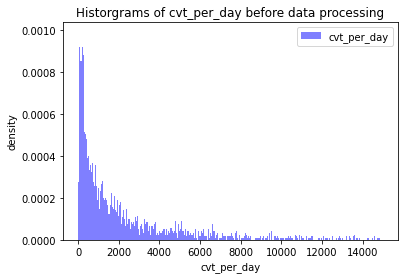

In [32]:
plt.hist(prime['cvt_per_day'],bins=range(0,15000,30),color='b',label='cvt_per_day',density=True,alpha=0.5)
plt.title('Historgrams of cvt_per_day before data processing')
plt.legend(loc='upper right')
plt.xlabel('cvt_per_day')
plt.ylabel('density')

plt.show()

<AxesSubplot:>

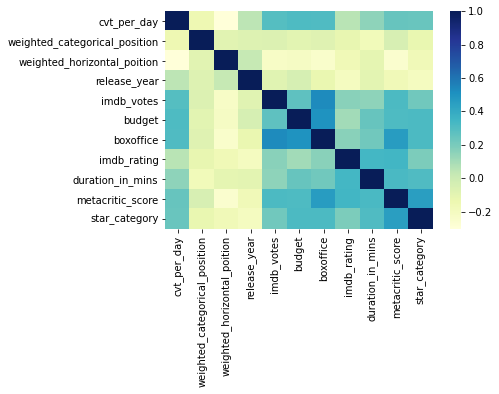

In [37]:
corr = prime[['cvt_per_day','weighted_categorical_position','weighted_horizontal_poition'
               ,'release_year', 'imdb_votes', 'budget', 'boxoffice' ,'imdb_rating', 
               'duration_in_mins', 'metacritic_score', 'star_category']].corr()

sns.heatmap(corr, cmap="YlGnBu")

In [38]:
corr

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
cvt_per_day,1.000000,-0.148000,-0.301663,0.045859,0.297697,0.315886,0.312209,0.058894,0.152217,0.249159,0.246956
weighted_categorical_position,-0.148000,1.000000,-0.084066,-0.068902,-0.063700,-0.089899,-0.073628,-0.116443,-0.174461,-0.044317,-0.122851
weighted_horizontal_poition,-0.301663,-0.084066,1.000000,0.026634,-0.220749,-0.211356,-0.244709,-0.162021,-0.102344,-0.255015,-0.167801
release_year,0.045859,-0.068902,0.026634,1.000000,-0.082661,-0.040121,-0.128091,-0.198856,-0.096811,-0.167038,-0.198454
imdb_votes,0.297697,-0.063700,-0.220749,-0.082661,1.000000,0.272852,0.531467,0.163264,0.155670,0.321860,0.225192
budget,0.315886,-0.089899,-0.211356,-0.040121,0.272852,1.000000,0.504618,0.105671,0.251342,0.314608,0.321721
boxoffice,0.312209,-0.073628,-0.244709,-0.128091,0.531467,0.504618,1.000000,0.163673,0.226184,0.464965,0.322329
imdb_rating,0.058894,-0.116443,-0.162021,-0.198856,0.163264,0.105671,0.163673,1.000000,0.344055,0.346935,0.191768
duration_in_mins,0.152217,-0.174461,-0.102344,-0.096811,0.155670,0.251342,0.226184,0.344055,1.000000,0.327050,0.309110
metacritic_score,0.249159,-0.044317,-0.255015,-0.167038,0.321860,0.314608,0.464965,0.346935,0.327050,1.000000,0.452445


In [ ]:
# After finishing numerical features, I need to have a look at categorical features

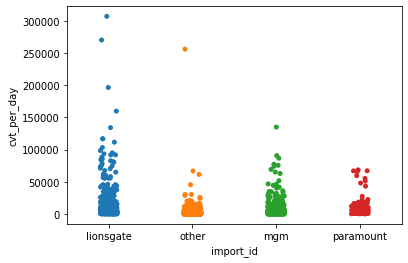

other        2963
lionsgate     677
mgm           445
paramount     141
Name: import_id, dtype: int64


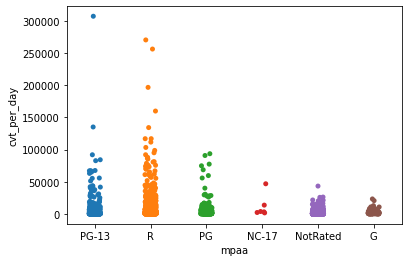

NotRated    2158
R           1158
PG-13        426
PG           353
G            125
NC-17          6
Name: mpaa, dtype: int64


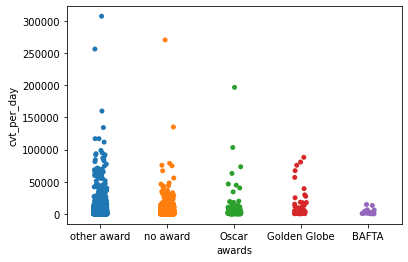

no award        2569
other award     1453
Oscar            141
Golden Globe      44
BAFTA             19
Name: awards, dtype: int64


In [39]:
sns.stripplot(x='import_id', y='cvt_per_day', data = prime, jitter = True)
plt.show()
print(prime['import_id'].value_counts())

sns.stripplot(x='mpaa', y='cvt_per_day', data = prime, jitter = True)
plt.show()
print(prime['mpaa'].value_counts())

sns.stripplot(x='awards', y='cvt_per_day', data = prime, jitter = True)
plt.show()
print(prime['awards'].value_counts())

In [42]:
# Before doing encoding, I find that genres variable is complicated
# Some videos belongs to more than 1 genre, the genre of each video is splited, 
# this would help emphasize the effect of each individual genre.

Action                    739
Adult                       3
Adventure                 363
Animation                 129
Anime                      11
Comedy                   1184
Crime                     437
Documentary               671
Drama                    1677
Fantasy                   243
Foreign/International      64
Holiday                     1
Horror                    762
Independent               393
Kids & Family             280
LGBT                        2
Lifestyle                   7
Music                     171
Musicals                   68
Mystery                   375
Reality                     9
Romance                   591
Sci-Fi                    363
Sport                      77
Thriller                  879
War                       102
Western                   102
dtype: int64


<AxesSubplot:>

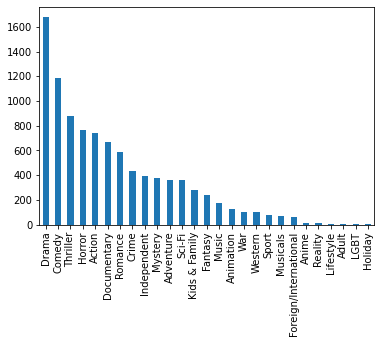

In [41]:
# generes explore, split the genre of each video
gen_split = prime['genres'].str.get_dummies(sep=',').sum()
print(gen_split)

gen_split.sort_values(ascending=False).plot.bar()

In [ ]:
# The release year of video varies through a wide range. Considering the popularity of a video usually decays over time, 
# the release_year should be bucketed based on the release_year range.

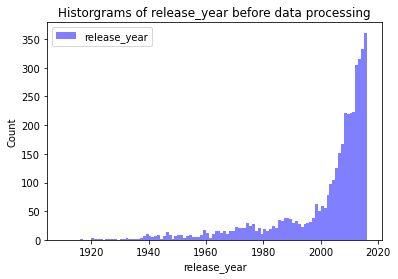

In [43]:
plt.hist(prime['release_year'].values, bins = range(1910, 2017, 1), alpha = 0.5, color='b', label = 'release_year')
plt.legend(loc ='upper left')
plt.title('Historgrams of release_year before data processing')
plt.xlabel('release_year')
plt.ylabel('Count')
plt.show()

In [ ]:
# After basic exploratory data analysis, there are following things need to do
# 1. Encode categorical features
# 2. Impute missing data(many zeros) for both numerical and categorical data
# 3. Scale out features

In [ ]:
# Feature Preprocessing

In [ ]:
# There are 5 categorical features: import_id, mpaa, awards, genres, and release_year. 
# There is no missing data in them. They can be converted into dummy/indicators.

In [44]:
# The first 3 (import_id, mpaa, awards )have relatively small sub-types, they can be easily converted to dummies.

In [48]:
d_import = pd.get_dummies(prime["import_id"]).astype(np.int64)
d_mpaa = pd.get_dummies(prime["mpaa"]).astype(np.int64)
d_awards = pd.get_dummies(prime["awards"]).astype(np.int64)

In [ ]:
# The 'genres' have 27 different sub-types, 6 of them are rarely observed (refer to previous section).
# It's reasonable to group these 6 into

# Note: a video may have more than one genre, in the feature preprocessing, all genres are handled individually.
# The release_year is binned into 10 buckets based on the year range between 1917 and 2017.

In [60]:
d_genres = prime["genres"].str.get_dummies(sep = ",").astype(np.int64)
d_genres['Misc_genres'] = d_genres['Anime']|d_genres['Reality']|d_genres['Lifestyle']|d_genres['Adult']|d_genres['LGBT']|d_genres['Holiday']

In [61]:
d_genres.drop(['Anime', 'Reality','Lifestyle', 'Adult','LGBT','Holiday'], inplace=True, axis=1)

In [63]:
# Bucketize release_year

In [66]:
prime['release_year'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

0.1    1974.0
0.2    1991.0
0.3    2001.0
0.4    2006.0
0.5    2008.0
0.6    2010.0
0.7    2012.0
0.8    2013.0
0.9    2014.0
Name: release_year, dtype: float64

In [69]:
# bin release_year and convert into dummies
bin_year = [1916, 1974, 1991, 2001, 2006, 2008, 2010, 2012, 2013, 2014, 2017]
year_range = ['1916-1974', '1974-1991', '1991-2001', '2001-2006','2006-2008','2008-2010','2010-2012','2012-2013',
              '2013-2014','2014-2017']
year_bin = pd.cut(prime['release_year'], bin_year, labels = year_range)
d_year = pd.get_dummies(year_bin).astype(np.int64)

In [71]:
# new dataframe, drop the previous categorical features, add new dummy variables, check for null

temp_prime=prime.drop(['import_id', 'mpaa','awards','genres', 'release_year'], axis=1)

new_prime = pd.concat([temp_prime, d_import, d_mpaa, d_awards, d_genres, d_year], axis=1)
print(new_prime.head())

   video_id    cvt_per_day  weighted_categorical_position  \
0    385504  307127.605608                              1   
1    300175  270338.426375                              1   
2    361899  256165.867446                              1   
3    308314  196622.720996                              3   
4    307201  159841.652064                              1   

   weighted_horizontal_poition  imdb_votes    budget  boxoffice  imdb_rating  \
0                            3       69614  15000000   42930462          6.5   
1                            3       46705  15000000    3301046          6.5   
2                            3      197596  26000000   37397291          7.3   
3                            4      356339  15000000   15700000          7.6   
4                            3       46720  27220000    8551228          6.4   

   duration_in_mins  metacritic_score  ...  1916-1974  1974-1991  1991-2001  \
0        112.301017                51  ...          0          0         

In [ ]:
#Among the 10 numerical features (not include video_id), 
#4 features have over 25% of missing values (shown as '0', which is not possible in reality): budget, boxoffice, metacritic_score, star_category. 
#2 features have less than 10% of missing data: imdb_votes, imdb_rating.

#There are 3242 samples have at least one missing data.

In [ ]:
# Right Now we have to deal with the missing data.
# According to the data info, there is no Null value in our dataset.
# That's good, but we have to be catious, cause zero value can be a very good candidate for missing data. 
# So we have the check the ratio of zero value in our numeric feature

In [72]:
# convert all zeros in these features column to null values
new_prime[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']] = new_prime[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']].replace(0, np.nan)
print(new_prime.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   video_id                       4226 non-null   int64  
 1   cvt_per_day                    4226 non-null   float64
 2   weighted_categorical_position  4226 non-null   int64  
 3   weighted_horizontal_poition    4226 non-null   int64  
 4   imdb_votes                     3882 non-null   float64
 5   budget                         1772 non-null   float64
 6   boxoffice                      1032 non-null   float64
 7   imdb_rating                    3882 non-null   float64
 8   duration_in_mins               4226 non-null   float64
 9   metacritic_score               1214 non-null   float64
 10  star_category                  2380 non-null   float64
 11  lionsgate                      4226 non-null   int64  
 12  mgm                            4226 non-null   i

In [74]:
# calculate the percentage of missing data in each features
print(new_prime.isnull().sum()/new_prime.shape[0])

video_id                         0.000000
cvt_per_day                      0.000000
weighted_categorical_position    0.000000
weighted_horizontal_poition      0.000000
imdb_votes                       0.081401
budget                           0.580691
boxoffice                        0.755797
imdb_rating                      0.081401
duration_in_mins                 0.000000
metacritic_score                 0.712731
star_category                    0.436820
lionsgate                        0.000000
mgm                              0.000000
other                            0.000000
paramount                        0.000000
G                                0.000000
NC-17                            0.000000
NotRated                         0.000000
PG                               0.000000
PG-13                            0.000000
R                                0.000000
BAFTA                            0.000000
Golden Globe                     0.000000
Oscar                            0

In [ ]:
# It's time to deal with these missing data!
# Impute all zeros by mean

In [75]:
new_prime1=new_prime.copy()
new_prime1['boxoffice']=new_prime1['boxoffice'].fillna(new_prime1['boxoffice'].mean())
new_prime1['metacritic_score']=new_prime1['metacritic_score'].fillna(new_prime1['metacritic_score'].mean())
new_prime1['star_category']=new_prime1['star_category'].fillna(new_prime1['star_category'].mean())
new_prime1['imdb_votes']=new_prime1['imdb_votes'].fillna(new_prime1['imdb_votes'].mean())
new_prime1['imdb_rating']=new_prime1['imdb_rating'].fillna(new_prime1['imdb_rating'].mean())
new_prime1['budget']=new_prime1['budget'].fillna(new_prime1['budget'].mean())
print(new_prime1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   video_id                       4226 non-null   int64  
 1   cvt_per_day                    4226 non-null   float64
 2   weighted_categorical_position  4226 non-null   int64  
 3   weighted_horizontal_poition    4226 non-null   int64  
 4   imdb_votes                     4226 non-null   float64
 5   budget                         4226 non-null   float64
 6   boxoffice                      4226 non-null   float64
 7   imdb_rating                    4226 non-null   float64
 8   duration_in_mins               4226 non-null   float64
 9   metacritic_score               4226 non-null   float64
 10  star_category                  4226 non-null   float64
 11  lionsgate                      4226 non-null   int64  
 12  mgm                            4226 non-null   i

In [77]:
# new_prime1 is the dataframe after filling out all missing values


In [ ]:
# Feature Scaling
# Here are no specific requirement for the range of output, I choose to use standard scaler

In [81]:
#Standard scaling

scale_lst = ['weighted_categorical_position', 'weighted_horizontal_poition', 'budget','boxoffice', 
             'imdb_votes','imdb_rating','duration_in_mins', 'metacritic_score','star_category']
new_prime_sc = new_prime1.copy()

sc_scale = preprocessing.StandardScaler().fit(new_prime_sc[scale_lst])
new_prime_sc[scale_lst] = sc_scale.transform(new_prime_sc[scale_lst])
new_prime_sc.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,...,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,385504,307127.605608,-1.105826,-2.116264,1.984496,1.470049,4.695913,0.541892,1.078791,-0.629733,...,0,0,0,0,0,0,0,1,0,0
1,300175,270338.426375,-1.105826,-2.116264,1.258002,1.470049,-1.022340,0.541892,0.257409,-1.997101,...,0,0,0,0,0,0,0,1,0,0
2,361899,256165.867446,-1.105826,-2.116264,6.043083,3.108277,3.897514,1.099791,1.243025,0.327425,...,0,0,0,0,0,0,1,0,0,0
3,308314,196622.720996,-0.779746,-2.031963,11.077168,1.470049,0.766744,1.309003,1.951625,5.249951,...,0,0,0,0,1,0,0,0,0,0
4,307201,159841.652064,-1.105826,-2.116264,1.258478,3.289972,-0.264775,0.472155,0.758378,-2.544049,...,0,0,0,0,0,0,0,1,0,0


In [86]:
# split data into 85% training and 15% testing data
# drop video_id and cvt_per_day in independent variables
# select only cvt_per_day in depending variable
train, test = model_selection.train_test_split(new_prime_sc, test_size = 0.15, random_state = 3)
model_train_x = train.drop(['video_id', 'cvt_per_day'], axis = 1)
model_test_x = test.drop(['video_id', 'cvt_per_day'], axis = 1)
model_train_y = train['cvt_per_day']
model_test_y = test['cvt_per_day']

In [ ]:
# Model selection
# 1. Lasso Regression

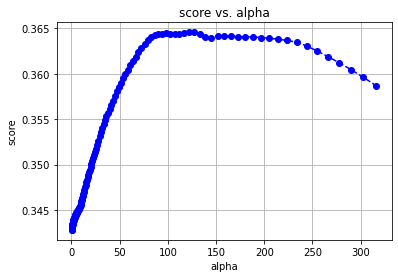

The optimaized alpha and score of Lasso linear is: 


(None, 122.06107238906554, 0.36457853302954246)

In [88]:
lr_train, lr_validate = train_test_split(train, test_size=0.15, random_state = 0)

lr_train_x = lr_train.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_validate_x = lr_validate.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_train_y = lr_train['cvt_per_day']
lr_validate_y = lr_validate['cvt_per_day']

alphas = np.logspace (-0.3, 2.5, num=150)
# alphas= [0.000000001]
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    lasso = Lasso()
    lasso.set_params(alpha = a)
    lasso.fit(lr_train_x, lr_train_y)
    scores[i] = lasso.score(lr_validate_x, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        lasso_save = lasso
plt.plot(alphas, scores, color='b', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
model1_para = opt_a
print ('The optimaized alpha and score of Lasso linear is: '), opt_a, max_score


In [89]:
# combine the validate data and training data, use the optimal alpha, re-train the model
lasso_f = Lasso()
lasso_f.set_params(alpha = opt_a)
lasso_f.fit(model_train_x, model_train_y)

Lasso(alpha=122.06107238906554)

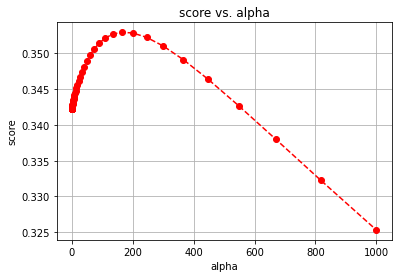

The optimaized alpha and score of Ridge linear is: 


(None, 163.97026580002054, 0.35296043098491625)

In [90]:
# Use the same training data set as Lasso (linear features)
lr_train, lr_validate = train_test_split(train, test_size=0.15, random_state = 0)

alphas = np.logspace (-10, 3, num=150)
# alphas= [0.000000001]
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    ridge = Ridge()
    ridge.set_params(alpha = a)
    ridge.fit(lr_train_x, lr_train_y)
    scores[i] = ridge.score(lr_validate_x, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        ridge_save = ridge
plt.plot(alphas, scores, color='r', linestyle='dashed', marker='o',markerfacecolor='r', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
model3_para = opt_a
print ('The optimaized alpha and score of Ridge linear is: '), opt_a, max_score

In [91]:
# add the 15% validate data, use the optimal alpha, re-train the model

ridge_f = Ridge()
ridge_f.set_params(alpha = opt_a)
ridge_f.fit(model_train_x, model_train_y)

# ridge_f is the Ridge model (linear feature), to be tested with test data.

Ridge(alpha=163.97026580002054)

In [93]:
rf = RandomForestRegressor(random_state=2,max_features='sqrt',n_jobs=-1)
param_grid={'n_estimators':[55,56,57,58,59,60,61,62,63,64,65],'max_depth':[15,16,17,18,19,20,21]}
clf=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,refit=True,n_jobs=-1,pre_dispatch='2*n_jobs')
clf.fit(model_train_x,model_train_y)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_features='sqrt', n_jobs=-1,
                                             random_state=2),
             n_jobs=-1,
             param_grid={'max_depth': [15, 16, 17, 18, 19, 20, 21],
                         'n_estimators': [55, 56, 57, 58, 59, 60, 61, 62, 63,
                                          64, 65]})

{'mean_fit_time': array([0.47734995, 0.43741283, 0.45860724, 0.46299691, 0.49517703,
       0.56154313, 0.4608892 , 0.50093236, 0.5143229 , 0.60560641,
       0.69635224, 0.79572964, 0.81100101, 0.64790926, 0.70292835,
       0.5654232 , 0.64333353, 0.5867301 , 0.55836601, 0.59953861,
       0.70348463, 0.62077217, 0.52134075, 0.56528845, 0.50779924,
       0.55682101, 0.68409352, 0.62389803, 0.78048854, 0.74329634,
       0.84213052, 0.69383941, 0.76637754, 0.49183125, 0.56544018,
       0.59394641, 0.67377219, 0.675912  , 0.64855762, 0.83421173,
       1.16837463, 0.96004877, 0.8688592 , 0.86037784, 0.74730301,
       0.76082358, 0.7980803 , 0.56296606, 0.70686679, 0.68678246,
       0.77477851, 0.65932584, 0.5901072 , 0.63658361, 0.67174845,
       0.56934619, 0.65359135, 0.61306195, 0.54277258, 0.55525842,
       0.51757722, 0.5976634 , 0.59420166, 0.59367213, 0.68813043,
       0.75004611, 0.61758699, 0.70077076, 0.88917875, 0.63176637,
       0.55669279, 0.57722936, 0.55813088, 0

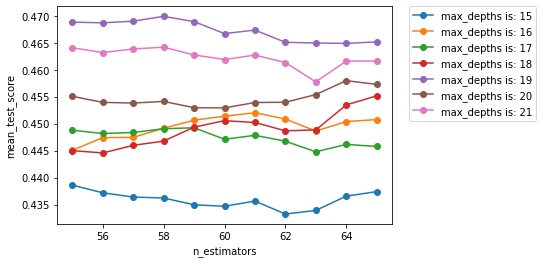

the best parameter for max_depth is: 19
the best parameter for n_estimators is: 58


In [94]:
result=clf.cv_results_
print(result)
max_depth=[15,16,17,18,19,20,21]
n_estimators=[55,56,57,58,59,60,61,62,63,64,65]
scores=clf.cv_results_['mean_test_score'].reshape(len(max_depth),len(n_estimators))
plt.figure(1)
plt.subplot(1,1,1)
for i,j in enumerate(max_depth):
    plt.plot(n_estimators,scores[i],'-o',label='max_depths is: '+str(j))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('n_estimators')
plt.ylabel('mean_test_score')
plt.show()
print('the best parameter for max_depth is: '+str(clf.best_params_['max_depth']))
print('the best parameter for n_estimators is: '+str(clf.best_params_['n_estimators']))

In [95]:
# Model evaluation

In [96]:
train_x = model_train_x
train_y = model_train_y
test_x = model_test_x
test_y = model_test_y

In [97]:
#For lasso
from sklearn.linear_model import Lasso
from sklearn.metrics import  mean_squared_error
lasso=Lasso(alpha=model1_para)
lasso.fit(train_x,train_y)
pred_y=lasso.predict(test_x)
lasso_score=lasso.score(test_x,test_y)
MSE_lasso=mean_squared_error(test_y,pred_y)
RMSE_lasso=np.sqrt(MSE_lasso)
print ('lasso score: ', lasso_score)
print ('Mean square error of lasso: ', MSE_lasso)
print ('Root mean squared error of lasso:', RMSE_lasso)

lasso score:  0.09954927178753703
Mean square error of lasso:  238953191.99910036
Root mean squared error of lasso: 15458.110880670392


In [98]:
#for ridge
from sklearn.metrics import  mean_squared_error
ridge=Ridge(alpha=model3_para)
ridge.fit(train_x,train_y)
pred_y=ridge.predict(test_x)
ridge_score=ridge.score(test_x,test_y)
MSE_ridge=mean_squared_error(test_y,pred_y)
RMSE_ridge=np.sqrt(MSE_ridge)
print ('ridge score: ', ridge_score)
print ('Mean square error of ridge: ', MSE_ridge)
print ('Root mean squared error of ridge:', RMSE_ridge)

ridge score:  0.11371374943726797
Mean square error of ridge:  235194355.40609524
Root mean squared error of ridge: 15336.047580980416


In [99]:
#For randomforest regression
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=clf.best_params_['n_estimators'],max_depth=clf.best_params_['max_depth'],max_features='sqrt',random_state=2,n_jobs=-1)
rf.fit(train_x,train_y)
pred_y=rf.predict(test_x)
rf_score=rf.score(test_x,test_y)
MSE_rf=mean_squared_error(test_y,pred_y)
RMSE_rf=np.sqrt(MSE_rf)
print ('rf score: ', rf_score)
print ('Mean square error of rf: ', MSE_rf)
print ('Root mean squared error of rf:', RMSE_rf)

rf score:  0.5139461304918904
Mean square error of rf:  128984429.64563024
Root mean squared error of rf: 11357.131224285042


In [100]:
# Model Comparison

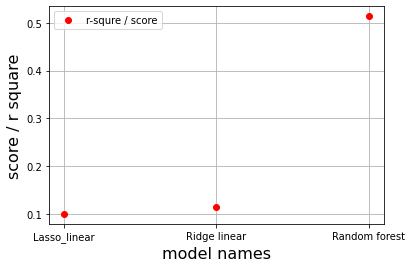

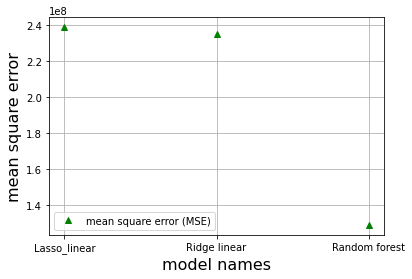

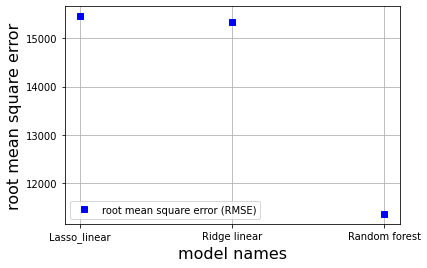

In [101]:
lst_score = [lasso_score, ridge_score, rf_score]
MSE_lst =  [MSE_lasso, MSE_ridge, MSE_rf]
RMSE_lst =  [RMSE_lasso, RMSE_ridge, RMSE_rf]
model_lst = ['Lasso_linear', 'Ridge linear', 'Random forest']

plt.figure(1)
plt.plot(model_lst, lst_score, 'ro')
plt.legend(['r-squre / score'])
plt.xlabel('model names',fontsize =16)
plt.ylabel('score / r square', fontsize =16)
plt.grid(True)
plt.show()

plt.figure(2)
plt.plot(model_lst, MSE_lst, 'g^')
plt.legend(['mean square error (MSE)'])
plt.xlabel('model names', fontsize =16)
plt.ylabel('mean square error', fontsize =16)
plt.grid(True)
plt.show()

plt.figure(3)
plt.plot(model_lst, RMSE_lst, 'bs')
plt.legend(['root mean square error (RMSE)'])
plt.xlabel('model names', fontsize =16)
plt.ylabel('root mean square error', fontsize =16)
plt.grid(True)
plt.show()

In [ ]:
# Feature Importance
# According to MSE,RMSE and R square, the Random Forest Regression has the best performance

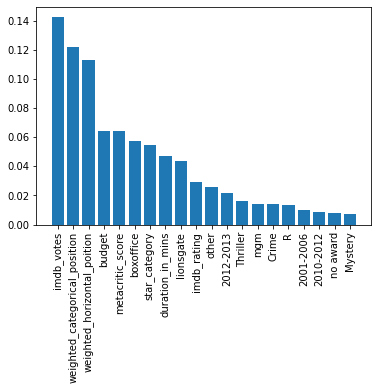

In [102]:
importances = rf.feature_importances_
feature_name = train_x.columns.values
indices = np.argsort(importances)[::-1]
plt.figure(1)
plt.bar(feature_name[indices[:20]], importances[indices[:20]])
plt.xticks(rotation=90)
plt.show()